In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib

matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['mathtext.fontset']='cm'
matplotlib.rcParams['axes.unicode_minus']=False

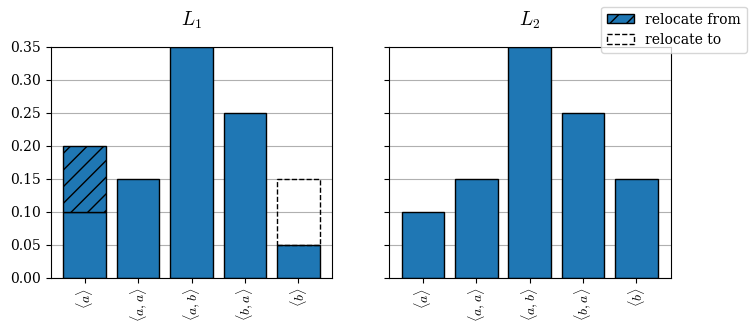

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)

# left sub plot

d1 = {
    r"$\langle a \rangle$": 2,
    r"$\langle a, a \rangle$": 3,
    r"$\langle a, b \rangle$": 7,
    r"$\langle b, a \rangle$": 5,
    r"$\langle b \rangle$": 1,
}

d2 = {
    r"$\langle a \rangle$": 2,
    r"$\langle a, a \rangle$": np.nan,
    r"$\langle a, b \rangle$": np.nan,
    r"$\langle b, a \rangle$": np.nan,
    r"$\langle b \rangle$": np.nan,
}

d3 = {
    r"$\langle a \rangle$": np.nan,
    r"$\langle a, a \rangle$": np.nan,
    r"$\langle a, b \rangle$": np.nan,
    r"$\langle b, a \rangle$": np.nan,
    r"$\langle b \rangle$": 2,
}

names = list(d1.keys())
v1 = list(d1.values())
v2 = list(d2.values())
v3 = list(d3.values())

total = sum(v1) + sum([ v for v in v2 if not np.isnan(v)])
v1 = [ v / total for v in v1 ]
v2 = [ v / total for v in v2 ]
v3 = [ v / total for v in v3 ]

axs[0].grid(axis="y", zorder=1.0)
axs[0].bar(names, v1, edgecolor="black", zorder=2.0)
axs[0].bar(names, v2, bottom=v1, color="tab:blue", edgecolor="black", hatch="//", label="relocate from", zorder=2.0)
axs[0].bar(names, v3, bottom=v1, fill=False, edgecolor="black", linestyle="--", label="relocate to", zorder=2.0)
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_title(r"$L_1$", pad=15, size=14.0)

# right sub plot

d = {
    r"$\langle a \rangle$": 2,
    r"$\langle a, a \rangle$": 3,
    r"$\langle a, b \rangle$": 7,
    r"$\langle b, a \rangle$": 5,
    r"$\langle b \rangle$": 3,
}

names = list(d.keys())
v = list(d.values())

total = sum(v)
v = [ v / total for v in v ]

axs[1].grid(axis="y", zorder=1.0)
axs[1].bar(names, v,  edgecolor="black", zorder=2.0)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_title(r"$L_2$", pad=15, size=14.0)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

plt.savefig("graphs/playground/EMSC_probability_mass.png", dpi=300, bbox_inches="tight")

In [4]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

,d,s1,s2,mmlngld
0,0.537940,0.000000,0.343081,0.683199
1,0.489496,0.350000,0.342988,0.571501
2,0.444924,0.399499,0.342976,0.536844
3,0.466948,0.426107,0.342794,0.541249
4,0.461858,0.397480,0.342700,0.545884


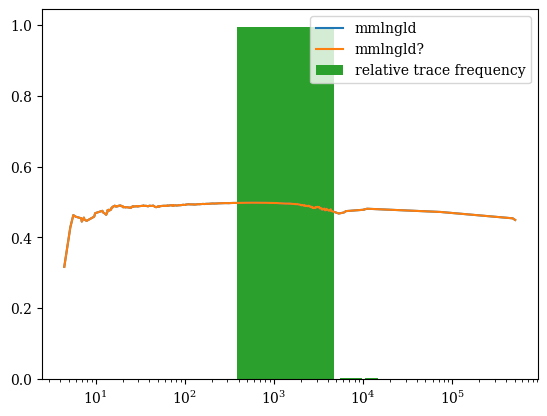

In [5]:
name = "PrepaidTravelCost.RequestedAmount"

df_x = pd.read_csv(f"./results/attribute_values/av.{name}.csv",  header=None)
df_y = pd.read_csv(f"./results/out.mmlngld.{name}.mt.csv", header=None, names=["d","s1","s2","mmlngld"])
df_z = pd.read_csv(f"./results/out.stats.{name}.csv", header=None, names=["l1","l2","rf"])

display(df_y.head())

plt.gca().set_xscale("log")

# plt.plot(df_x[0][1:], df_y["d"], label="d")
# plt.plot(df_x[0][1:], df_y["s1"], label="s1")
# plt.plot(df_x[0][1:], df_y["s2"], label="s2")
plt.plot(df_x[0][1:], 1 - df_y["mmlngld"], label="mmlngld")
plt.plot(df_x[0][1:], [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_y["d"], df_y["s1"], df_y["s2"]) ], label="mmlngld?")
# plt.plot(df_x[0][1:], df_z["l1"], label=r"$|L_1|$")
# plt.plot(df_x[0][1:], df_z["l2"], label=r"$|L_2|$")
plt.hist(df_x[0][1:], bins=100, weights=df_z["rf"], rwidth=0.85, label="relative trace frequency")
plt.legend()
# plt.show()

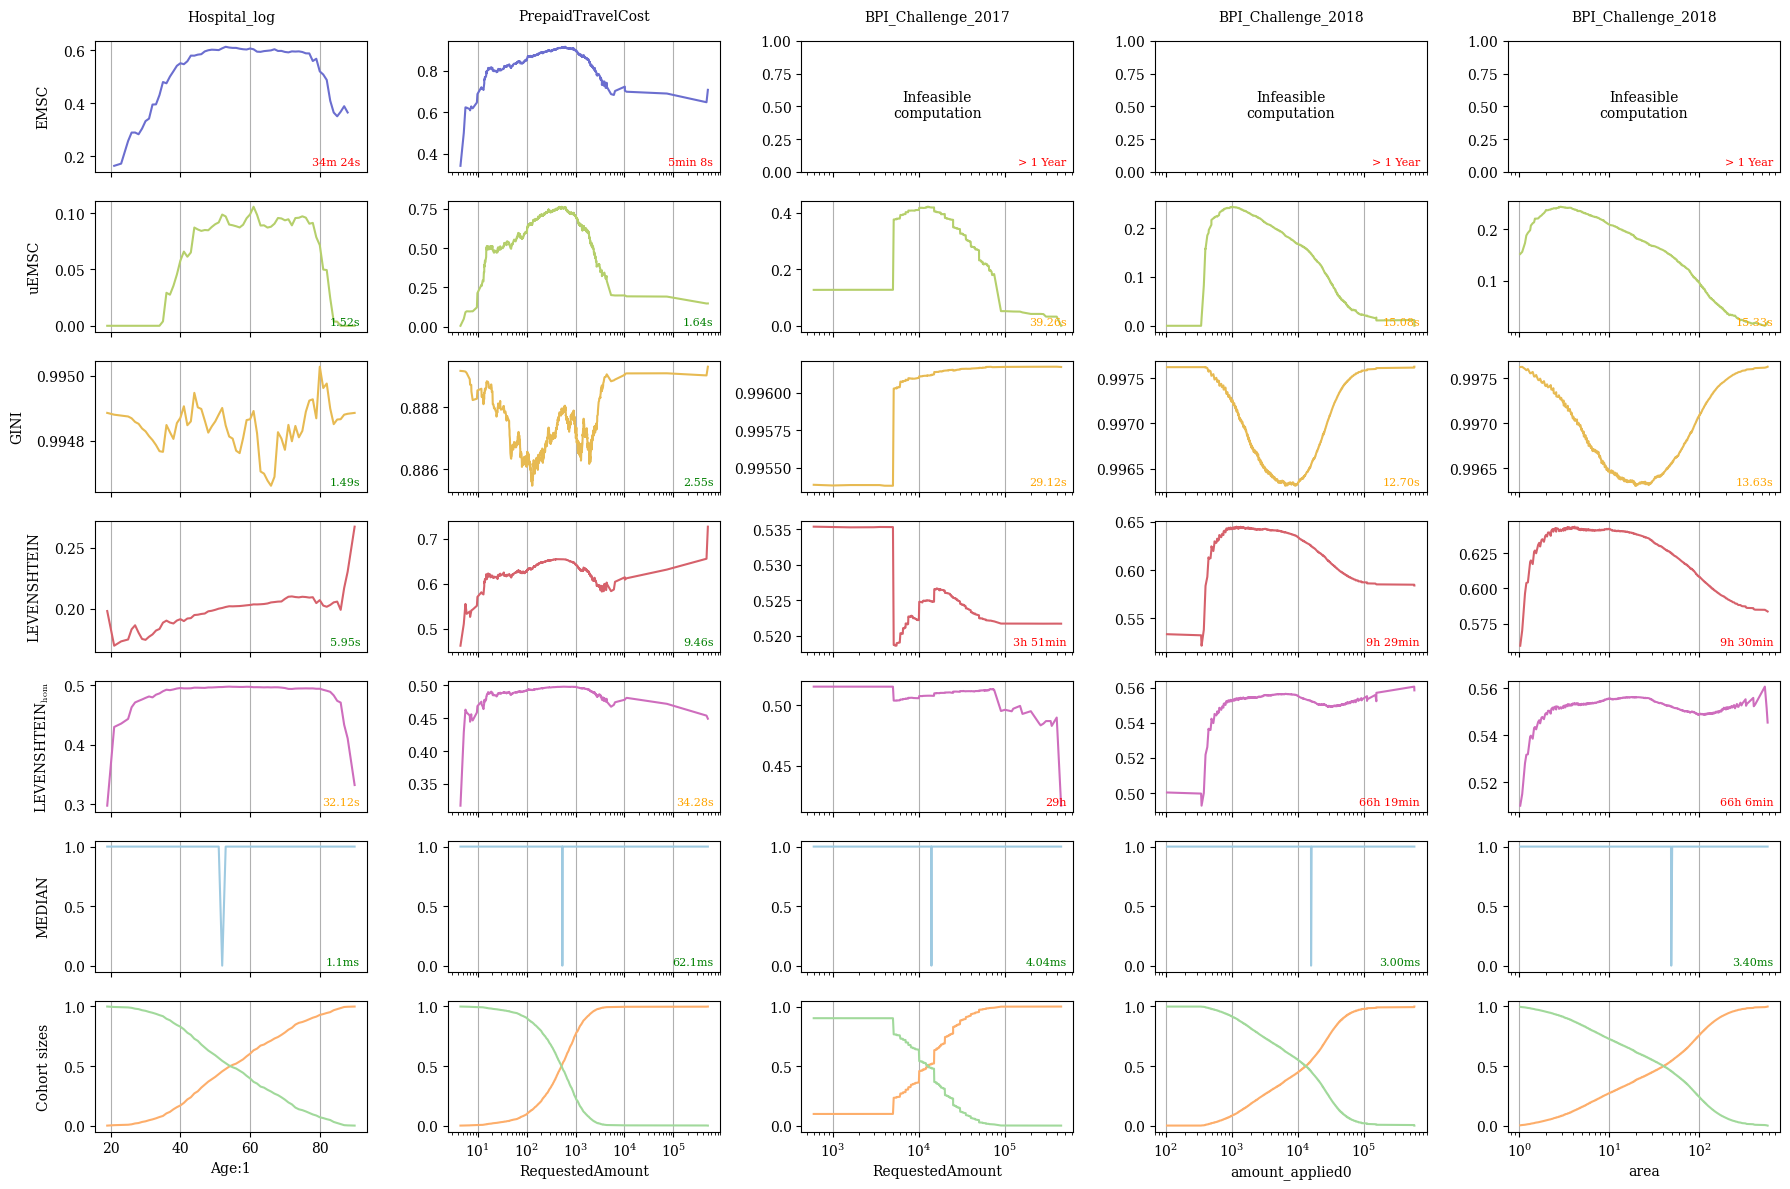

In [6]:
fig, axs = plt.subplots(7, 5, figsize=(18,12), sharex='col')

colors = list(plt.get_cmap('tab20b')(np.linspace(0, 1, 20))) + list(plt.get_cmap('tab20c')(np.linspace(0, 1, 20)))
colors_1 = colors[0::4]
colors_2 = colors[1::4]
colors_3 = colors[2::4]
colors_4 = colors[3::4]

# first column

# df_syn_1_property_lt_20 = pd.read_csv("./results/attribute_values/av.syn_1.property_lt_20.csv", header=None)
# df_syn_2_property_lt_20 = pd.read_csv("./results/attribute_values/av.syn_2.property_lt_20.csv", header=None)
df_syn_3_property_lt_20 = pd.read_csv("./results/attribute_values/av.syn_3.property_lt_20.csv", header=None)
df_syn_4_property_lt_20 = pd.read_csv("./results/attribute_values/av.syn_4.property_lt_20.csv", header=None)
df_Hospital_log_Age_1 = pd.read_csv("./results/attribute_values/av.Hospital_log.Age:1.csv", header=None)
df_Hospital_log_Age_1_for_emsc = pd.read_csv("./results/attribute_values/av.Hospital_log.Age:1.for_emsc.csv", header=None)
df_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/attribute_values/av.BPI_Challenge_2017.RequestedAmount.csv", header=None)
df_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/attribute_values/av.BPI_Challenge_2018.amount_applied0.csv", header=None)
df_BPI_Challenge_2018_area = pd.read_csv("./results/attribute_values/av.BPI_Challenge_2018.area.csv", header=None)
df_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/attribute_values/av.PrepaidTravelCost.RequestedAmount.csv", header=None)


# df_emsc_syn_1_property_lt_20 = pd.read_csv("./results/out.emsc.syn_1.property_lt_20.csv", header=None, names=["emsc"])
# df_uemsc_syn_1_property_lt_20 = pd.read_csv("./results/out.uemsc.syn_1.property_lt_20.csv", header=None, names=["uemsc"])
# df_gini_syn_1_property_lt_20 = pd.read_csv("./results/out.gini.syn_1.property_lt_20.csv", header=None, names=["gini"])
# df_mmlngld_syn_1_property_lt_20 = pd.read_csv("./results/out.mmlngld.syn_1.property_lt_20.csv", header=None, names=["d","s1","s2"])
# df_median_syn_1_property_lt_20 = pd.read_csv("./results/out.median.syn_1.property_lt_20.csv", header=None, names=["median"])
# df_stats_syn_1_property_lt_20 = pd.read_csv("./results/out.stats.syn_1.property_lt_20.csv", header=None, names=["l1","l2","rf"])

# df_emsc_syn_2_property_lt_20 = pd.read_csv("./results/out.emsc.syn_2.property_lt_20.csv", header=None, names=["emsc"])
# df_uemsc_syn_2_property_lt_20 = pd.read_csv("./results/out.uemsc.syn_2.property_lt_20.csv", header=None, names=["uemsc"])
# df_gini_syn_2_property_lt_20 = pd.read_csv("./results/out.gini.syn_2.property_lt_20.csv", header=None, names=["gini"])
# df_mmlngld_syn_2_property_lt_20 = pd.read_csv("./results/out.mmlngld.syn_2.property_lt_20.csv", header=None, names=["d","s1","s2"])
# df_median_syn_2_property_lt_20 = pd.read_csv("./results/out.median.syn_2.property_lt_20.csv", header=None, names=["median"])
# df_stats_syn_2_property_lt_20 = pd.read_csv("./results/out.stats.syn_2.property_lt_20.csv", header=None, names=["l1","l2","rf"])

df_emsc_syn_3_property_lt_20 = pd.read_csv("./results/out.emsc.syn_3.property_lt_20.csv", header=None, names=["emsc"])
df_uemsc_syn_3_property_lt_20 = pd.read_csv("./results/out.uemsc.syn_3.property_lt_20.csv", header=None, names=["uemsc"])
df_gini_syn_3_property_lt_20 = pd.read_csv("./results/out.gini.syn_3.property_lt_20.csv", header=None, names=["gini"])
df_mmlngld_syn_3_property_lt_20 = pd.read_csv("./results/out.mmlngld.syn_3.property_lt_20.csv", header=None, names=["d","s1","s2"])
df_median_syn_3_property_lt_20 = pd.read_csv("./results/out.median.syn_3.property_lt_20.csv", header=None, names=["median"])
df_stats_syn_3_property_lt_20 = pd.read_csv("./results/out.stats.syn_3.property_lt_20.csv", header=None, names=["l1","l2","rf"])

df_emsc_syn_4_property_lt_20 = pd.read_csv("./results/out.emsc.syn_4.property_lt_20.csv", header=None, names=["emsc"])
df_uemsc_syn_4_property_lt_20 = pd.read_csv("./results/out.uemsc.syn_4.property_lt_20.csv", header=None, names=["uemsc"])
df_gini_syn_4_property_lt_20 = pd.read_csv("./results/out.gini.syn_4.property_lt_20.csv", header=None, names=["gini"])
df_mmlngld_syn_4_property_lt_20 = pd.read_csv("./results/out.mmlngld.syn_4.property_lt_20.csv", header=None, names=["d","s1","s2"])
df_median_syn_4_property_lt_20 = pd.read_csv("./results/out.median.syn_4.property_lt_20.csv", header=None, names=["median"])
df_stats_syn_4_property_lt_20 = pd.read_csv("./results/out.stats.syn_4.property_lt_20.csv", header=None, names=["l1","l2","rf"])

df_emsc_Hospital_log_Age_1 = pd.read_csv("./results/out.emsc.Hospital_log.Age:1.csv", header=None, names=["emsc"])
df_uemsc_Hospital_log_Age_1 = pd.read_csv("./results/out.uemsc.Hospital_log.Age:1.csv", header=None, names=["uemsc"])
df_gini_Hospital_log_Age_1 = pd.read_csv("./results/out.gini.Hospital_log.Age:1.csv", header=None, names=["gini"])
df_mmlngld_Hospital_log_Age_1 = pd.read_csv("./results/out.mmlngld.Hospital_log.Age:1.csv", header=None, names=["d","s1","s2"])
df_median_Hospital_log_Age_1 = pd.read_csv("./results/out.median.Hospital_log.Age:1.csv", header=None, names=["median"])
df_stats_Hospital_log_Age_1 = pd.read_csv("./results/out.stats.Hospital_log.Age:1.csv", header=None, names=["l1","l2","rf"])

# TODO df_emsc_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.emsc.BPI_Challenge_2017.RequestedAmount.csv", header=None, names=["emsc"])
df_uemsc_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.uemsc.BPI_Challenge_2017.RequestedAmount.csv", header=None, names=["uemsc"])
df_gini_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.gini.BPI_Challenge_2017.RequestedAmount.csv", header=None, names=["gini"])
df_lngld_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.lngld.BPI_Challenge_2017.RequestedAmount.mt.csv", header=None, names=["lngld"])
df_mmlngld_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.mmlngld.BPI_Challenge_2017.RequestedAmount.mt.csv", header=None, names=["d","s1","s2"])
df_median_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.median.BPI_Challenge_2017.RequestedAmount.csv", header=None, names=["median"])
df_stats_BPI_Challenge_2017_RequestedAmount = pd.read_csv("./results/out.stats.BPI_Challenge_2017.RequestedAmount.csv", header=None, names=["l1","l2","rf"])

# TODO df_emsc_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.emsc.BPI_Challenge_2018.amount_applied0.csv", header=None, names=["emsc"])
df_uemsc_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.uemsc.BPI_Challenge_2018.amount_applied0.csv", header=None, names=["uemsc"])
df_gini_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.gini.BPI_Challenge_2018.amount_applied0.csv", header=None, names=["gini"])
df_lngld_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.lngld.BPI_Challenge_2018.amount_applied0.mt.csv", header=None, names=["lngld"])
df_mmlngld_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.mmlngld.BPI_Challenge_2018.amount_applied0.mt.csv", header=None, names=["d","s1","s2"])
df_median_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.median.BPI_Challenge_2018.amount_applied0.csv", header=None, names=["median"])
df_stats_BPI_Challenge_2018_amount_applied0 = pd.read_csv("./results/out.stats.BPI_Challenge_2018.amount_applied0.csv", header=None, names=["l1","l2","rf"])

# TODO df_emsc_BPI_Challenge_2018_area = pd.read_csv("./results/out.emsc.BPI_Challenge_2018.area.csv", header=None, names=["emsc"])
df_uemsc_BPI_Challenge_2018_area = pd.read_csv("./results/out.uemsc.BPI_Challenge_2018.area.csv", header=None, names=["uemsc"])
df_gini_BPI_Challenge_2018_area = pd.read_csv("./results/out.gini.BPI_Challenge_2018.area.csv", header=None, names=["gini"])
df_lngld_BPI_Challenge_2018_area = pd.read_csv("./results/out.lngld.BPI_Challenge_2018.area.mt.csv", header=None, names=["lngld"])
df_mmlngld_BPI_Challenge_2018_area = pd.read_csv("./results/out.mmlngld.BPI_Challenge_2018.area.mt.csv", header=None, names=["d","s1","s2"])
df_median_BPI_Challenge_2018_area = pd.read_csv("./results/out.median.BPI_Challenge_2018.area.csv", header=None, names=["median"])
df_stats_BPI_Challenge_2018_area = pd.read_csv("./results/out.stats.BPI_Challenge_2018.area.csv", header=None, names=["l1","l2","rf"])

df_emsc_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/out.emsc.PrepaidTravelCost.RequestedAmount.mt.csv", header=None, names=["emsc"])
df_uemsc_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/out.uemsc.PrepaidTravelCost.RequestedAmount.csv", header=None, names=["uemsc"])
df_gini_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/out.gini.PrepaidTravelCost.RequestedAmount.csv", header=None, names=["gini"])
df_mmlngld_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/out.mmlngld.PrepaidTravelCost.RequestedAmount.mt.csv", header=None, names=["d","s1","s2","mmlngld"])
df_median_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/out.median.PrepaidTravelCost.RequestedAmount.csv", header=None, names=["median"])
df_stats_PrepaidTravelCost_RequestedAmount = pd.read_csv("./results/out.stats.PrepaidTravelCost.RequestedAmount.csv", header=None, names=["l1","l2","rf"])

df_mmlngld_syn_4_property_lt_20["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_syn_4_property_lt_20["d"], df_mmlngld_syn_4_property_lt_20["s1"], df_mmlngld_syn_4_property_lt_20["s2"]) ]
df_mmlngld_syn_3_property_lt_20["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_syn_3_property_lt_20["d"], df_mmlngld_syn_3_property_lt_20["s1"], df_mmlngld_syn_3_property_lt_20["s2"]) ]
df_mmlngld_Hospital_log_Age_1["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_Hospital_log_Age_1["d"], df_mmlngld_Hospital_log_Age_1["s1"], df_mmlngld_Hospital_log_Age_1["s2"]) ]
df_mmlngld_PrepaidTravelCost_RequestedAmount["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_PrepaidTravelCost_RequestedAmount["d"], df_mmlngld_PrepaidTravelCost_RequestedAmount["s1"], df_mmlngld_PrepaidTravelCost_RequestedAmount["s2"]) ]
df_mmlngld_BPI_Challenge_2017_RequestedAmount["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_BPI_Challenge_2017_RequestedAmount["d"], df_mmlngld_BPI_Challenge_2017_RequestedAmount["s1"], df_mmlngld_BPI_Challenge_2017_RequestedAmount["s2"]) ]
df_mmlngld_BPI_Challenge_2018_amount_applied0["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_BPI_Challenge_2018_amount_applied0["d"], df_mmlngld_BPI_Challenge_2018_amount_applied0["s1"], df_mmlngld_BPI_Challenge_2018_amount_applied0["s2"]) ]
df_mmlngld_BPI_Challenge_2018_area["mmlngld"] = [ 1 - (d + (2 - s1 - s2) / 2) / 2 for d, s1, s2 in zip(df_mmlngld_BPI_Challenge_2018_area["d"], df_mmlngld_BPI_Challenge_2018_area["s1"], df_mmlngld_BPI_Challenge_2018_area["s2"]) ]

# # axs[6,1].set_xlabel(r"$\mathrm{prop}_{\leq20}$")
# axs[0,1].set_xticks(np.linspace(df_syn_3_property_lt_20[0].to_list()[0], df_syn_3_property_lt_20[0].to_list()[-1], 6))

# # axs[0,1].grid(axis="x", zorder=1.0)
# # axs[0,1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_emsc_syn_3_property_lt_20["emsc"], color=colors_3[0])
# # axs[0,1].text(0.975, 0.05, '12h 54min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,1].transAxes })

# # axs[1,1].grid(axis="x", zorder=1.0)
# # axs[1,1].plot(df_syn_3_property_lt_20[0][1:], df_uemsc_syn_3_property_lt_20["uemsc"], color=colors_3[1])
# # axs[1,1].text(0.975, 0.05, '1.79s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,1].transAxes })

# # axs[2,1].grid(axis="x", zorder=1.0)
# # axs[2,1].plot(df_syn_3_property_lt_20[0][1:], df_gini_syn_3_property_lt_20["gini"], color=colors_3[2])
# # axs[2,1].text(0.975, 0.05, '1.90s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,1].transAxes })

# # axs[3,1].grid(axis="x", zorder=1.0)
# # axs[3,1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_mmlngld_syn_3_property_lt_20["d"], color=colors_3[3])
# # axs[3,1].text(0.975, 0.05, '37.77s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[3,1].transAxes })

# # axs[4,1].grid(axis="x", zorder=1.0)
# # axs[4,1].plot(df_syn_3_property_lt_20[0][1:], df_mmlngld_syn_3_property_lt_20["mmlngld"], color=colors_3[4])
# # axs[4,1].text(0.975, 0.05, '2min 35s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[4,1].transAxes })

# # axs[5,1].grid(axis="x", zorder=1.0)
# # axs[5,1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_median_syn_3_property_lt_20["median"], color=colors_3[5])
# # axs[5,1].text(0.975, 0.05, '1.29ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,1].transAxes })

# # axs[6,1].grid(axis="x", zorder=1.0)
# # axs[6,1].plot(df_syn_3_property_lt_20[0][1:], df_stats_syn_3_property_lt_20["l1"], color=colors_3[6], label=r"$|L_1|$")
# # axs[6,1].plot(df_syn_3_property_lt_20[0][1:], df_stats_syn_3_property_lt_20["l2"], color=colors_3[7], label=r"$|L_2|$")
# # # axs[6,1].hist(df_syn_3_property_lt_20[0][1:], bins=100, weights=df_stats_syn_3_property_lt_20["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")

# # axs[6,0].set_xlabel(r"$\mathrm{prop}_{\leq20}$")
# # # axs[0,0].set_xticks(np.linspace(df_syn_4_property_lt_20[0].to_list()[0], df_syn_4_property_lt_20[0].to_list()[-1], 6))

# # axs[0,0].grid(axis="x", zorder=1.0)
# # axs[0,0].plot(df_syn_4_property_lt_20[0][1:], 1 - df_emsc_syn_4_property_lt_20["emsc"], color=colors_3[0])
# # axs[0,0].text(0.975, 0.05, '1.58s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[0,0].transAxes })

# # axs[1,0].grid(axis="x", zorder=1.0)
# # axs[1,0].plot(df_syn_4_property_lt_20[0][1:], df_uemsc_syn_4_property_lt_20["uemsc"], color=colors_3[1])
# # axs[1,0].text(0.975, 0.05, '65.68ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,0].transAxes })

# # axs[2,0].grid(axis="x", zorder=1.0)
# # axs[2,0].plot(df_syn_4_property_lt_20[0][1:], df_gini_syn_4_property_lt_20["gini"], color=colors_3[2])
# # axs[2,0].text(0.975, 0.05, '74.28ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,0].transAxes })

# # axs[3,0].grid(axis="x", zorder=1.0)
# # axs[3,0].plot(df_syn_4_property_lt_20[0][1:], 1 - df_mmlngld_syn_4_property_lt_20["d"], color=colors_3[3])
# # axs[3,0].text(0.975, 0.05, '117.32ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[3,0].transAxes })

# # axs[4,0].grid(axis="x", zorder=1.0)
# # axs[4,0].plot(df_syn_4_property_lt_20[0][1:], df_mmlngld_syn_4_property_lt_20["mmlngld"], color=colors_3[4])
# # axs[4,0].text(0.975, 0.05, '259.17ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[4,0].transAxes })

# # axs[5,0].grid(axis="x", zorder=1.0)
# # axs[5,0].plot(df_syn_4_property_lt_20[0][1:], 1 - df_median_syn_4_property_lt_20["median"], color=colors_3[5])
# # axs[5,0].text(0.975, 0.05, '1.47ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,0].transAxes })

# # axs[6,0].grid(axis="x", zorder=1.0)
# # axs[6,0].plot(df_syn_4_property_lt_20[0][1:], df_stats_syn_4_property_lt_20["l1"], color=colors_3[6], label=r"$|L_1|$")
# # axs[6,0].plot(df_syn_4_property_lt_20[0][1:], df_stats_syn_4_property_lt_20["l2"], color=colors_3[7], label=r"$|L_2|$")
# # # axs[6,0].hist(df_syn_4_property_lt_20[0][1:], bins=100, weights=df_stats_syn_4_property_lt_20["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")
# # axs[6,0].legend()

axs[6,0].set_xlabel("Age:1")
# axs[0,0].set_xticks(np.linspace(df_Hospital_log_Age_1[0].to_list()[0], df_Hospital_log_Age_1[0].to_list()[-1], 6))

axs[0,0].grid(axis="x", zorder=1.0)
axs[0,0].plot(df_Hospital_log_Age_1[0][2:-1], 1 - df_emsc_Hospital_log_Age_1["emsc"], color=colors_3[0])
axs[0,0].text(0.975, 0.05, '34m 24s', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,0].transAxes })

axs[1,0].grid(axis="x", zorder=1.0)
axs[1,0].plot(df_Hospital_log_Age_1[0][1:], df_uemsc_Hospital_log_Age_1["uemsc"], color=colors_3[1])
axs[1,0].text(0.975, 0.05, '1.52s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,0].transAxes })

axs[2,0].grid(axis="x", zorder=1.0)
axs[2,0].plot(df_Hospital_log_Age_1[0][1:], df_gini_Hospital_log_Age_1["gini"], color=colors_3[2])
axs[2,0].text(0.975, 0.05, '1.49s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,0].transAxes })

axs[3,0].grid(axis="x", zorder=1.0)
axs[3,0].plot(df_Hospital_log_Age_1[0][1:], 1 - df_mmlngld_Hospital_log_Age_1["d"], color=colors_3[3])
axs[3,0].text(0.975, 0.05, '5.95s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[3,0].transAxes })

axs[4,0].grid(axis="x", zorder=1.0)
axs[4,0].plot(df_Hospital_log_Age_1[0][1:], df_mmlngld_Hospital_log_Age_1["mmlngld"], color=colors_3[4])
axs[4,0].text(0.975, 0.05, '32.12s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[4,0].transAxes })

axs[5,0].grid(axis="x", zorder=1.0)
axs[5,0].plot(df_Hospital_log_Age_1[0][1:], 1 - df_median_Hospital_log_Age_1["median"], color=colors_3[5])
axs[5,0].text(0.975, 0.05, '1.1ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,0].transAxes })

axs[6,0].grid(axis="x", zorder=1.0)
axs[6,0].plot(df_Hospital_log_Age_1[0][1:], df_stats_Hospital_log_Age_1["l1"], color=colors_3[6], label=r"$|L_1|$")
axs[6,0].plot(df_Hospital_log_Age_1[0][1:], df_stats_Hospital_log_Age_1["l2"], color=colors_3[7], label=r"$|L_2|$")
# axs[6,2].hist(df_Hospital_log_Age_1[0][1:], bins=100, weights=df_stats_Hospital_log_Age_1["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")

axs[6,1].set_xlabel("RequestedAmount")
# axs[0,1].set_xticks(np.linspace(df_PrepaidTravelCost_RequestedAmount[0].to_list()[0], df_PrepaidTravelCost_RequestedAmount[0].to_list()[-1], 6))
axs[0,1].set_xscale("log")

axs[0,1].grid(axis="x", zorder=1.0)
axs[0,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_emsc_PrepaidTravelCost_RequestedAmount["emsc"], color=colors_3[0])
axs[0,1].text(0.975, 0.05, '5min 8s', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,1].transAxes })

axs[1,1].grid(axis="x", zorder=1.0)
axs[1,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_uemsc_PrepaidTravelCost_RequestedAmount["uemsc"], color=colors_3[1])
axs[1,1].text(0.975, 0.05, '1.64s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,1].transAxes })

axs[2,1].grid(axis="x", zorder=1.0)
axs[2,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_gini_PrepaidTravelCost_RequestedAmount["gini"], color=colors_3[2])
axs[2,1].text(0.975, 0.05, '2.55s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,1].transAxes })

axs[3,1].grid(axis="x", zorder=1.0)
axs[3,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_mmlngld_PrepaidTravelCost_RequestedAmount["d"], color=colors_3[3])
axs[3,1].text(0.975, 0.05, '9.46s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[3,1].transAxes })

axs[4,1].grid(axis="x", zorder=1.0)
axs[4,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_mmlngld_PrepaidTravelCost_RequestedAmount["mmlngld"], color=colors_3[4])
axs[4,1].text(0.975, 0.05, '34.28s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[4,1].transAxes })

axs[5,1].grid(axis="x", zorder=1.0)
axs[5,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_median_PrepaidTravelCost_RequestedAmount["median"], color=colors_3[5])
axs[5,1].text(0.975, 0.05, '62.1ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,1].transAxes })

axs[6,1].grid(axis="x", zorder=1.0)
axs[6,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_stats_PrepaidTravelCost_RequestedAmount["l1"], color=colors_3[6], label=r"$|L_1|$")
axs[6,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_stats_PrepaidTravelCost_RequestedAmount["l2"], color=colors_3[7], label=r"$|L_2|$")
# axs[6,1].hist(df_PrepaidTravelCost_RequestedAmount[0][1:], bins=100, weights=df_stats_PrepaidTravelCost_RequestedAmount["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")

axs[6,2].set_xlabel("RequestedAmount")
# axs[0,2].set_xticks(np.linspace(df_BPI_Challenge_2017_RequestedAmount[0].to_list()[0], df_BPI_Challenge_2017_RequestedAmount[0].to_list()[-1], 6))
axs[0,2].set_xscale("log")

# axs[0,2].grid(axis="x", zorder=1.0)
# axs[0,2].plot(df_Hospital_log_Age_1[0][1:], 1 - df_emsc_Hospital_log_Age_1["emsc"], color=colors_3[0])
axs[0,2].text(0.975, 0.05, '> 1 Year', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,2].transAxes })
axs[0,2].text(0.5, 0.42, 'Infeasible\ncomputation', size=10, **{ "horizontalalignment": "center", "transform": axs[0,2].transAxes })

axs[1,2].grid(axis="x", zorder=1.0)
axs[1,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_uemsc_BPI_Challenge_2017_RequestedAmount["uemsc"], color=colors_3[1])
axs[1,2].text(0.975, 0.05, '39.26s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[1,2].transAxes })

axs[2,2].grid(axis="x", zorder=1.0)
axs[2,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_gini_BPI_Challenge_2017_RequestedAmount["gini"], color=colors_3[2])
axs[2,2].text(0.975, 0.05, '29.12s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[2,2].transAxes })

axs[3,2].grid(axis="x", zorder=1.0)
axs[3,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_mmlngld_BPI_Challenge_2017_RequestedAmount["d"], color=colors_3[3])
axs[3,2].text(0.975, 0.05, '3h 51min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[3,2].transAxes })

axs[4,2].grid(axis="x", zorder=1.0)
axs[4,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_mmlngld_BPI_Challenge_2017_RequestedAmount["mmlngld"], color=colors_3[4])
axs[4,2].text(0.975, 0.05, '29h', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[4,2].transAxes })

axs[5,2].grid(axis="x", zorder=1.0)
axs[5,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_median_BPI_Challenge_2017_RequestedAmount["median"], color=colors_3[5])
axs[5,2].text(0.975, 0.05, '4.04ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,2].transAxes })

axs[6,2].grid(axis="x", zorder=1.0)
axs[6,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], color=colors_3[6], label=r"$|L_1|$")
axs[6,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], color=colors_3[7], label=r"$|L_2|$")
# axs[6,2].hist(df_BPI_Challenge_2017_RequestedAmount[0][1:], bins=100, weights=df_stats_BPI_Challenge_2017_RequestedAmount["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")

axs[6,3].set_xlabel("amount_applied0")
# axs[0,3].set_xticks(np.linspace(df_BPI_Challenge_2018_amount_applied0[0].to_list()[0], df_BPI_Challenge_2018_amount_applied0[0].to_list()[-1], 6))
axs[0,3].set_xscale("log")

# axs[0,3].grid(axis="x", zorder=1.0)
# axs[0,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_emsc_BPI_Challenge_2018_amount_applied0["emsc"], color=colors_3[0])
axs[0,3].text(0.975, 0.05, '> 1 Year', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,3].transAxes })
axs[0,3].text(0.5, 0.42, 'Infeasible\ncomputation', size=10, **{ "horizontalalignment": "center", "transform": axs[0,3].transAxes })

axs[1,3].grid(axis="x", zorder=1.0)
axs[1,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_uemsc_BPI_Challenge_2018_amount_applied0["uemsc"], color=colors_3[1])
axs[1,3].text(0.975, 0.05, '15.08s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[1,3].transAxes })

axs[2,3].grid(axis="x", zorder=1.0)
axs[2,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_gini_BPI_Challenge_2018_amount_applied0["gini"], color=colors_3[2])
axs[2,3].text(0.975, 0.05, '12.70s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[2,3].transAxes })

axs[3,3].grid(axis="x", zorder=1.0)
axs[3,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_mmlngld_BPI_Challenge_2018_amount_applied0["d"], color=colors_3[3])
axs[3,3].text(0.975, 0.05, '9h 29min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[3,3].transAxes })

axs[4,3].grid(axis="x", zorder=1.0)
axs[4,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_mmlngld_BPI_Challenge_2018_amount_applied0["mmlngld"], color=colors_3[4])
axs[4,3].text(0.975, 0.05, '66h 19min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[4,3].transAxes })

axs[5,3].grid(axis="x", zorder=1.0)
axs[5,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_median_BPI_Challenge_2018_amount_applied0["median"], color=colors_3[5])
axs[5,3].text(0.975, 0.05, '3.00ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,3].transAxes })

axs[6,3].grid(axis="x", zorder=1.0)
axs[6,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_stats_BPI_Challenge_2018_amount_applied0["l1"], color=colors_3[6], label=r"$|L_1|$")
axs[6,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_stats_BPI_Challenge_2018_amount_applied0["l2"], color=colors_3[7], label=r"$|L_2|$")
# axs[6,3].hist(df_BPI_Challenge_2018_amount_applied0[0][1:], bins=100, weights=df_stats_BPI_Challenge_2018_amount_applied0["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")

axs[6,4].set_xlabel("area")
# axs[0,4].set_xticks(np.linspace(df_BPI_Challenge_2018_area[0].to_list()[0], df_BPI_Challenge_2018_area[0].to_list()[-1], 6))
axs[0,4].set_xscale("log")

# axs[0,4].grid(axis="x", zorder=1.0)
# axs[0,4].plot(df_BPI_Challenge_2018_area[0][1:], 1 - df_emsc_BPI_Challenge_2018_area["emsc"], color=colors_3[0])
axs[0,4].text(0.975, 0.05, '> 1 Year', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,4].transAxes })
axs[0,4].text(0.5, 0.42, 'Infeasible\ncomputation', size=10, **{ "horizontalalignment": "center", "transform": axs[0,4].transAxes })

axs[1,4].grid(axis="x", zorder=1.0)
axs[1,4].plot(df_BPI_Challenge_2018_area[0][1:], df_uemsc_BPI_Challenge_2018_area["uemsc"], color=colors_3[1])
axs[1,4].text(0.975, 0.05, '15.33s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[1,4].transAxes })

axs[2,4].grid(axis="x", zorder=1.0)
axs[2,4].plot(df_BPI_Challenge_2018_area[0][1:], df_gini_BPI_Challenge_2018_area["gini"], color=colors_3[2])
axs[2,4].text(0.975, 0.05, '13.63s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[2,4].transAxes })

axs[3,4].grid(axis="x", zorder=1.0)
axs[3,4].plot(df_BPI_Challenge_2018_area[0][1:], 1 - df_mmlngld_BPI_Challenge_2018_area["d"], color=colors_3[3])
axs[3,4].text(0.975, 0.05, '9h 30min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[3,4].transAxes })

axs[4,4].grid(axis="x", zorder=1.0)
axs[4,4].plot(df_BPI_Challenge_2018_area[0][1:], df_mmlngld_BPI_Challenge_2018_area["mmlngld"], color=colors_3[4])
axs[4,4].text(0.975, 0.05, '66h 6min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[4,4].transAxes })

axs[5,4].grid(axis="x", zorder=1.0)
axs[5,4].plot(df_BPI_Challenge_2018_area[0][1:], 1 - df_median_BPI_Challenge_2018_area["median"], color=colors_3[5])
axs[5,4].text(0.975, 0.05, '3.40ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,4].transAxes })

axs[6,4].grid(axis="x", zorder=1.0)
axs[6,4].plot(df_BPI_Challenge_2018_area[0][1:], df_stats_BPI_Challenge_2018_area["l1"], color=colors_3[6], label=r"$|L_1|$")
axs[6,4].plot(df_BPI_Challenge_2018_area[0][1:], df_stats_BPI_Challenge_2018_area["l2"], color=colors_3[7], label=r"$|L_2|$")
# axs[6,4].hist(df_BPI_Challenge_2018_area[0][1:], bins=100, weights=df_stats_BPI_Challenge_2018_area["rf"], rwidth=0.85, color=colors_3[8], label="rel. trace freq.")
# axs[6,4].legend()


add_headers(fig, col_headers=["Hospital_log","PrepaidTravelCost","BPI_Challenge_2017","BPI_Challenge_2018","BPI_Challenge_2018"], row_headers=["EMSC","uEMSC","GINI","LEVENSHTEIN",r"LEVENSHTEIN$_{\mathrm{hom}}$", "MEDIAN", "Cohort sizes"], col_pad=15)
fig.tight_layout(w_pad=1)
plt.savefig("graphs/playground/heuristics_on_logs.png", dpi=600, bbox_inches="tight")

In [7]:
plt.ioff()

from paretoset import paretoset

pareto_optimal_values = {}

iter = [
    (df_syn_4_property_lt_20[0][1:], 1 - df_emsc_syn_4_property_lt_20["emsc"], df_stats_syn_4_property_lt_20["l1"], df_stats_syn_4_property_lt_20["l2"], "EMSC", r"(syn_1, $\mathrm{prop}_{\leq20}$)", colors_3[0]),
    (df_syn_3_property_lt_20[0][1:], 1 - df_emsc_syn_3_property_lt_20["emsc"], df_stats_syn_3_property_lt_20["l1"], df_stats_syn_3_property_lt_20["l2"], "EMSC", r"(syn_2, $\mathrm{prop}_{\leq20}$)", colors_3[0]),
    (df_Hospital_log_Age_1[0][2:-1], 1 - df_emsc_Hospital_log_Age_1["emsc"], df_stats_Hospital_log_Age_1["l1"][1:-1], df_stats_Hospital_log_Age_1["l2"][1:-1], "EMSC", "(Hospital_log, Age:1)", colors_3[0]),
    (df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_emsc_PrepaidTravelCost_RequestedAmount["emsc"], df_stats_PrepaidTravelCost_RequestedAmount["l1"], df_stats_PrepaidTravelCost_RequestedAmount["l2"], "EMSC", "(PrepaidTravelCost, RequestedAmount)", colors_3[0]),
    # (df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_emsc_BPI_Challenge_2017_RequestedAmount["emsc"], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], "EMSC", "(BPI_Challenge_2017, RequestedAmount)", colors_3[0]),
    # (df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_emsc_BPI_Challenge_2018_amount_applied0["emsc"], df_stats_BPI_Challenge_2018_amount_applied0["l1"], df_stats_BPI_Challenge_2018_amount_applied0["l2"], "EMSC", "(BPI_Challenge_2018, amount_applied0)", colors_3[0]),
    # (df_BPI_Challenge_2018_area[0][1:], 1 - df_emsc_BPI_Challenge_2018_area["emsc"], df_stats_BPI_Challenge_2018_area["l1"], df_stats_BPI_Challenge_2018_area["l2"], "EMSC", "(BPI_Challenge_2018, area)", colors_3[0]),

    (df_syn_4_property_lt_20[0][1:], df_uemsc_syn_4_property_lt_20["uemsc"], df_stats_syn_4_property_lt_20["l1"], df_stats_syn_4_property_lt_20["l2"], "uEMSC", r"(syn_1, $\mathrm{prop}_{\leq20}$)", colors_3[1]),
    (df_syn_3_property_lt_20[0][1:], df_uemsc_syn_3_property_lt_20["uemsc"], df_stats_syn_3_property_lt_20["l1"], df_stats_syn_3_property_lt_20["l2"], "uEMSC", r"(syn_2, $\mathrm{prop}_{\leq20}$)", colors_3[1]),
    (df_Hospital_log_Age_1[0][1:], df_uemsc_Hospital_log_Age_1["uemsc"], df_stats_Hospital_log_Age_1["l1"], df_stats_Hospital_log_Age_1["l2"], "uEMSC", "(Hospital_log, Age:1)", colors_3[1]),
    (df_PrepaidTravelCost_RequestedAmount[0][1:], df_uemsc_PrepaidTravelCost_RequestedAmount["uemsc"], df_stats_PrepaidTravelCost_RequestedAmount["l1"], df_stats_PrepaidTravelCost_RequestedAmount["l2"], "uEMSC", "(PrepaidTravelCost, RequestedAmount)", colors_3[1]),
    (df_BPI_Challenge_2017_RequestedAmount[0][1:], df_uemsc_BPI_Challenge_2017_RequestedAmount["uemsc"], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], "uEMSC", "(BPI_Challenge_2017, RequestedAmount)", colors_3[1]),
    (df_BPI_Challenge_2018_amount_applied0[0][1:], df_uemsc_BPI_Challenge_2018_amount_applied0["uemsc"], df_stats_BPI_Challenge_2018_amount_applied0["l1"], df_stats_BPI_Challenge_2018_amount_applied0["l2"], "uEMSC", "(BPI_Challenge_2018, amount_applied0)", colors_3[1]),
    (df_BPI_Challenge_2018_area[0][1:], df_uemsc_BPI_Challenge_2018_area["uemsc"], df_stats_BPI_Challenge_2018_area["l1"], df_stats_BPI_Challenge_2018_area["l2"], "uEMSC", "(BPI_Challenge_2018, area)", colors_3[1]),

    (df_syn_4_property_lt_20[0][1:], df_gini_syn_4_property_lt_20["gini"], df_stats_syn_4_property_lt_20["l1"], df_stats_syn_4_property_lt_20["l2"], "GINI", r"(syn_1, $\mathrm{prop}_{\leq20}$)", colors_3[2]),
    (df_syn_3_property_lt_20[0][1:], df_gini_syn_3_property_lt_20["gini"], df_stats_syn_3_property_lt_20["l1"], df_stats_syn_3_property_lt_20["l2"], "GINI", r"(syn_2, $\mathrm{prop}_{\leq20}$)", colors_3[2]),
    (df_Hospital_log_Age_1[0][1:], df_gini_Hospital_log_Age_1["gini"], df_stats_Hospital_log_Age_1["l1"], df_stats_Hospital_log_Age_1["l2"], "GINI", "(Hospital_log, Age:1)", colors_3[2]),
    (df_PrepaidTravelCost_RequestedAmount[0][1:], df_gini_PrepaidTravelCost_RequestedAmount["gini"], df_stats_PrepaidTravelCost_RequestedAmount["l1"], df_stats_PrepaidTravelCost_RequestedAmount["l2"], "GINI", "(PrepaidTravelCost, RequestedAmount)", colors_3[2]),
    (df_BPI_Challenge_2017_RequestedAmount[0][1:], df_gini_BPI_Challenge_2017_RequestedAmount["gini"], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], "GINI", "(BPI_Challenge_2017, RequestedAmount)", colors_3[2]),
    (df_BPI_Challenge_2018_amount_applied0[0][1:], df_gini_BPI_Challenge_2018_amount_applied0["gini"], df_stats_BPI_Challenge_2018_amount_applied0["l1"], df_stats_BPI_Challenge_2018_amount_applied0["l2"], "GINI", "(BPI_Challenge_2018, amount_applied0)", colors_3[2]),
    (df_BPI_Challenge_2018_area[0][1:], df_gini_BPI_Challenge_2018_area["gini"], df_stats_BPI_Challenge_2018_area["l1"], df_stats_BPI_Challenge_2018_area["l2"], "GINI", "(BPI_Challenge_2018, area)", colors_3[2]),

    (df_syn_4_property_lt_20[0][1:], 1 - df_mmlngld_syn_4_property_lt_20["d"], df_stats_syn_4_property_lt_20["l1"], df_stats_syn_4_property_lt_20["l2"], "LEVENSHTEIN", r"(syn_1, $\mathrm{prop}_{\leq20}$)", colors_3[3]),
    (df_syn_3_property_lt_20[0][1:], 1 - df_mmlngld_syn_3_property_lt_20["d"], df_stats_syn_3_property_lt_20["l1"], df_stats_syn_3_property_lt_20["l2"], "LEVENSHTEIN", r"(syn_2, $\mathrm{prop}_{\leq20}$)", colors_3[3]),
    (df_Hospital_log_Age_1[0][1:], 1 - df_mmlngld_Hospital_log_Age_1["d"], df_stats_Hospital_log_Age_1["l1"], df_stats_Hospital_log_Age_1["l2"], "LEVENSHTEIN", "(Hospital_log, Age:1)", colors_3[3]),
    (df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_mmlngld_PrepaidTravelCost_RequestedAmount["d"], df_stats_PrepaidTravelCost_RequestedAmount["l1"], df_stats_PrepaidTravelCost_RequestedAmount["l2"], "LEVENSHTEIN", "(PrepaidTravelCost, RequestedAmount)", colors_3[3]),
    (df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_mmlngld_BPI_Challenge_2017_RequestedAmount["d"], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], "LEVENSHTEIN", "(BPI_Challenge_2017, RequestedAmount)", colors_3[3]),
    (df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_mmlngld_BPI_Challenge_2018_amount_applied0["d"], df_stats_BPI_Challenge_2018_amount_applied0["l1"], df_stats_BPI_Challenge_2018_amount_applied0["l2"], "LEVENSHTEIN", "(BPI_Challenge_2018, amount_applied0)", colors_3[3]),
    (df_BPI_Challenge_2018_area[0][1:], 1 - df_mmlngld_BPI_Challenge_2018_area["d"], df_stats_BPI_Challenge_2018_area["l1"], df_stats_BPI_Challenge_2018_area["l2"], "LEVENSHTEIN", "(BPI_Challenge_2018, area)", colors_3[3]),

    (df_syn_4_property_lt_20[0][1:], df_mmlngld_syn_4_property_lt_20["mmlngld"], df_stats_syn_4_property_lt_20["l1"], df_stats_syn_4_property_lt_20["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", r"(syn_1, $\mathrm{prop}_{\leq20}$)", colors_3[4]),
    (df_syn_3_property_lt_20[0][1:], df_mmlngld_syn_3_property_lt_20["mmlngld"], df_stats_syn_3_property_lt_20["l1"], df_stats_syn_3_property_lt_20["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", r"(syn_2, $\mathrm{prop}_{\leq20}$)", colors_3[4]),
    (df_Hospital_log_Age_1[0][1:], df_mmlngld_Hospital_log_Age_1["mmlngld"], df_stats_Hospital_log_Age_1["l1"], df_stats_Hospital_log_Age_1["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", "(Hospital_log, Age:1)", colors_3[4]),
    (df_PrepaidTravelCost_RequestedAmount[0][1:], df_mmlngld_PrepaidTravelCost_RequestedAmount["mmlngld"], df_stats_PrepaidTravelCost_RequestedAmount["l1"], df_stats_PrepaidTravelCost_RequestedAmount["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", "(PrepaidTravelCost, RequestedAmount)", colors_3[4]),
    (df_BPI_Challenge_2017_RequestedAmount[0][1:], df_mmlngld_BPI_Challenge_2017_RequestedAmount["mmlngld"], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", "(BPI_Challenge_2017, RequestedAmount)", colors_3[4]),
    (df_BPI_Challenge_2018_amount_applied0[0][1:], df_mmlngld_BPI_Challenge_2018_amount_applied0["mmlngld"], df_stats_BPI_Challenge_2018_amount_applied0["l1"], df_stats_BPI_Challenge_2018_amount_applied0["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", "(BPI_Challenge_2018, amount_applied0)", colors_3[4]),
    (df_BPI_Challenge_2018_area[0][1:], df_mmlngld_BPI_Challenge_2018_area["mmlngld"], df_stats_BPI_Challenge_2018_area["l1"], df_stats_BPI_Challenge_2018_area["l2"], r"LEVENSHTEIN$_{\mathrm{hom}}$", "(BPI_Challenge_2018, area)", colors_3[4]),

    (df_syn_4_property_lt_20[0][1:], 1 - df_median_syn_4_property_lt_20["median"], df_stats_syn_4_property_lt_20["l1"], df_stats_syn_4_property_lt_20["l2"], "MEDIAN", r"(syn_1, $\mathrm{prop}_{\leq20}$)", colors_3[5]),
    (df_syn_3_property_lt_20[0][1:], 1 - df_median_syn_3_property_lt_20["median"], df_stats_syn_3_property_lt_20["l1"], df_stats_syn_3_property_lt_20["l2"], "MEDIAN", r"(syn_2, $\mathrm{prop}_{\leq20}$)", colors_3[5]),
    (df_Hospital_log_Age_1[0][1:], 1 - df_median_Hospital_log_Age_1["median"], df_stats_Hospital_log_Age_1["l1"], df_stats_Hospital_log_Age_1["l2"], "MEDIAN", "(Hospital_log, Age:1)", colors_3[5]),
    (df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_median_PrepaidTravelCost_RequestedAmount["median"], df_stats_PrepaidTravelCost_RequestedAmount["l1"], df_stats_PrepaidTravelCost_RequestedAmount["l2"], "MEDIAN", "(PrepaidTravelCost, RequestedAmount)", colors_3[5]),
    (df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_median_BPI_Challenge_2017_RequestedAmount["median"], df_stats_BPI_Challenge_2017_RequestedAmount["l1"], df_stats_BPI_Challenge_2017_RequestedAmount["l2"], "MEDIAN", "(BPI_Challenge_2017, RequestedAmount)", colors_3[5]),
    (df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_median_BPI_Challenge_2018_amount_applied0["median"], df_stats_BPI_Challenge_2018_amount_applied0["l1"], df_stats_BPI_Challenge_2018_amount_applied0["l2"], "MEDIAN", "(BPI_Challenge_2018, amount_applied0)", colors_3[5]),
    (df_BPI_Challenge_2018_area[0][1:], 1 - df_median_BPI_Challenge_2018_area["median"], df_stats_BPI_Challenge_2018_area["l1"], df_stats_BPI_Challenge_2018_area["l2"], "MEDIAN", "(BPI_Challenge_2018, area)", colors_3[5]),
]

for (avs, ys, l1s, l2s, h_name, title, col) in iter:

    sizes = [ min(l, g) for l, g in zip(l1s, l2s) ]

    mask = paretoset(pd.DataFrame({
        "ys": ys,
        "sizes": sizes,
    }), sense=["min","max"])
    pdx, pdy, val = zip(*[ (y, s, v) for y, s, m, v in zip(ys, sizes, mask, avs) if m ])
    pareto_optimal_values[f"{h_name} {title}"] = [list(val), list(pdx)]

    fig, ax = plt.subplots()

    ax.scatter(pdx, pdy, label="Pareto Optimal", color=colors_3[6], linewidths=5)
    ax.scatter(ys, sizes, color=col)

    # for x, y, v in zip(pdx, pdy, val):
    #     ax.annotate(int(v), (x, y), xytext=(0.75, -0.3), textcoords="offset fontsize")

    ax.legend()

    plt.xlabel(h_name)
    plt.ylabel("min cohort size")
    plt.title(title, pad=15, fontsize=8)
    plt.suptitle(f"Pareto Optimal {h_name} Splits", fontsize=15, y=1)
    plt.savefig(f'graphs/playground/pareto/{title}.{h_name}.{title}.png', bbox_inches='tight')

/tmp/ipykernel_646826/4048293728.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


In [8]:
pareto_optimal_values.keys()

dict_keys(['EMSC (syn_1, $\\mathrm{prop}_{\\leq20}$)', 'EMSC (syn_2, $\\mathrm{prop}_{\\leq20}$)', 'EMSC (Hospital_log, Age:1)', 'EMSC (PrepaidTravelCost, RequestedAmount)', 'uEMSC (syn_1, $\\mathrm{prop}_{\\leq20}$)', 'uEMSC (syn_2, $\\mathrm{prop}_{\\leq20}$)', 'uEMSC (Hospital_log, Age:1)', 'uEMSC (PrepaidTravelCost, RequestedAmount)', 'uEMSC (BPI_Challenge_2017, RequestedAmount)', 'uEMSC (BPI_Challenge_2018, amount_applied0)', 'uEMSC (BPI_Challenge_2018, area)', 'GINI (syn_1, $\\mathrm{prop}_{\\leq20}$)', 'GINI (syn_2, $\\mathrm{prop}_{\\leq20}$)', 'GINI (Hospital_log, Age:1)', 'GINI (PrepaidTravelCost, RequestedAmount)', 'GINI (BPI_Challenge_2017, RequestedAmount)', 'GINI (BPI_Challenge_2018, amount_applied0)', 'GINI (BPI_Challenge_2018, area)', 'LEVENSHTEIN (syn_1, $\\mathrm{prop}_{\\leq20}$)', 'LEVENSHTEIN (syn_2, $\\mathrm{prop}_{\\leq20}$)', 'LEVENSHTEIN (Hospital_log, Age:1)', 'LEVENSHTEIN (PrepaidTravelCost, RequestedAmount)', 'LEVENSHTEIN (BPI_Challenge_2017, RequestedAmoun

In [13]:
fig, axs = plt.subplots(6, 5, figsize=(18,12), sharex='col')

pareto_col = colors_3[6]

# # axs[5,1].set_xlabel(r"$\mathrm{prop}_{\leq20}$")
# # # axs[0,1].set_xticks(np.linspace(df_syn_3_property_lt_20[0].to_list()[0], df_syn_3_property_lt_20[0].to_list()[-1], 6))

# # p = pareto_optimal_values[r"EMSC (syn_2, $\mathrm{prop}_{\leq20}$)"]
# # axs[0,1].grid(axis="x", zorder=1.0)
# # axs[0,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[0,1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_emsc_syn_3_property_lt_20["emsc"], color=colors_3[0])
# # # axs[0,1].text(0.975, 0.05, '12h 54min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,1].transAxes })

# # p = pareto_optimal_values[r"uEMSC (syn_2, $\mathrm{prop}_{\leq20}$)"]
# # axs[1,1].grid(axis="x", zorder=1.0)
# # axs[1,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[1,1].plot(df_syn_3_property_lt_20[0][1:], df_uemsc_syn_3_property_lt_20["uemsc"], color=colors_3[1])
# # # axs[1,1].text(0.975, 0.05, '1.79s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,1].transAxes })

# # p = pareto_optimal_values[r"GINI (syn_2, $\mathrm{prop}_{\leq20}$)"]
# # axs[2,1].grid(axis="x", zorder=1.0)
# # axs[2,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[2,1].plot(df_syn_3_property_lt_20[0][1:], df_gini_syn_3_property_lt_20["gini"], color=colors_3[2])
# # # axs[2,1].text(0.975, 0.05, '1.90s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,1].transAxes })

# # p = pareto_optimal_values[r"LEVENSHTEIN (syn_2, $\mathrm{prop}_{\leq20}$)"]
# # axs[3,1].grid(axis="x", zorder=1.0)
# # axs[3,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[3,1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_mmlngld_syn_3_property_lt_20["d"], color=colors_3[3])
# # # axs[3,1].text(0.975, 0.05, '37.77s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[3,1].transAxes })

# # p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (syn_2, $\mathrm{prop}_{\leq20}$)"]
# # axs[4,1].grid(axis="x", zorder=1.0)
# # axs[4,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[4,1].plot(df_syn_3_property_lt_20[0][1:], df_mmlngld_syn_3_property_lt_20["mmlngld"], color=colors_3[4])
# # # axs[4,1].text(0.975, 0.05, '2min 35s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[4,1].transAxes })

# # p = pareto_optimal_values[r"MEDIAN (syn_2, $\mathrm{prop}_{\leq20}$)"]
# # axs[5,1].grid(axis="x", zorder=1.0)
# # axs[5,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[5,1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_median_syn_3_property_lt_20["median"], color=colors_3[5])
# # # axs[5,1].text(0.975, 0.05, '1.29ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,1].transAxes })

# # axs[5,0].set_xlabel(r"$\mathrm{prop}_{\leq20}$")
# # # axs[0,0].set_xticks(np.linspace(df_syn_4_property_lt_20[0].to_list()[0], df_syn_4_property_lt_20[0].to_list()[-1], 6))

# # p = pareto_optimal_values[r"EMSC (syn_1, $\mathrm{prop}_{\leq20}$)"]
# # axs[0,0].grid(axis="x", zorder=1.0)
# # axs[0,0].scatter(p[0], p[1], color=pareto_col, linewidths=2, label="Pareto Optimal")
# # axs[0,0].plot(df_syn_4_property_lt_20[0][1:], 1 - df_emsc_syn_4_property_lt_20["emsc"], color=colors_3[0])
# # # axs[0,0].text(0.975, 0.05, '1.58s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[0,0].transAxes })
# # axs[0,0].legend()

# # p = pareto_optimal_values[r"uEMSC (syn_1, $\mathrm{prop}_{\leq20}$)"]
# # axs[1,0].grid(axis="x", zorder=1.0)
# # axs[1,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[1,0].plot(df_syn_4_property_lt_20[0][1:], df_uemsc_syn_4_property_lt_20["uemsc"], color=colors_3[1])
# # # axs[1,0].text(0.975, 0.05, '65.68ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,0].transAxes })

# # p = pareto_optimal_values[r"GINI (syn_1, $\mathrm{prop}_{\leq20}$)"]
# # axs[2,0].grid(axis="x", zorder=1.0)
# # axs[2,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[2,0].plot(df_syn_4_property_lt_20[0][1:], df_gini_syn_4_property_lt_20["gini"], color=colors_3[2])
# # # axs[2,0].text(0.975, 0.05, '74.28ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,0].transAxes })

# # p = pareto_optimal_values[r"LEVENSHTEIN (syn_1, $\mathrm{prop}_{\leq20}$)"]
# # axs[3,0].grid(axis="x", zorder=1.0)
# # axs[3,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[3,0].plot(df_syn_4_property_lt_20[0][1:], 1 - df_mmlngld_syn_4_property_lt_20["d"], color=colors_3[3])
# # # axs[3,0].text(0.975, 0.05, '117.32ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[3,0].transAxes })

# # p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (syn_1, $\mathrm{prop}_{\leq20}$)"]
# # axs[4,0].grid(axis="x", zorder=1.0)
# # axs[4,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[4,0].plot(df_syn_4_property_lt_20[0][1:], df_mmlngld_syn_4_property_lt_20["mmlngld"], color=colors_3[4])
# # # axs[4,0].text(0.975, 0.05, '259.17ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[4,0].transAxes })

# # p = pareto_optimal_values[r"MEDIAN (syn_1, $\mathrm{prop}_{\leq20}$)"]
# # axs[5,0].grid(axis="x", zorder=1.0)
# # axs[5,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
# # axs[5,0].plot(df_syn_4_property_lt_20[0][1:], 1 - df_median_syn_4_property_lt_20["median"], color=colors_3[5])
# # # axs[5,0].text(0.975, 0.05, '1.47ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,0].transAxes })

axs[5,0].set_xlabel("Age:1")
# axs[0,0].set_xticks(np.linspace(df_Hospital_log_Age_1[0].to_list()[0], df_Hospital_log_Age_1[0].to_list()[-1], 6))

p = pareto_optimal_values[r"EMSC (Hospital_log, Age:1)"]
axs[0,0].grid(axis="x", zorder=1.0)
axs[0,0].scatter(p[0], p[1], color=pareto_col, linewidths=2, label="Pareto Optimal")
axs[0,0].plot(df_Hospital_log_Age_1[0][2:-1], 1 - df_emsc_Hospital_log_Age_1["emsc"], color=colors_3[0])
# # axs[0,0].text(0.975, 0.05, '34m 24s', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,0].transAxes })
axs[0,0].legend()

p = pareto_optimal_values[r"uEMSC (Hospital_log, Age:1)"]
axs[1,0].grid(axis="x", zorder=1.0)
axs[1,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[1,0].plot(df_Hospital_log_Age_1[0][1:], df_uemsc_Hospital_log_Age_1["uemsc"], color=colors_3[1])
# # axs[1,0].text(0.975, 0.05, '1.52s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,0].transAxes })

p = pareto_optimal_values[r"GINI (Hospital_log, Age:1)"]
axs[2,0].grid(axis="x", zorder=1.0)
axs[2,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[2,0].plot(df_Hospital_log_Age_1[0][1:], df_gini_Hospital_log_Age_1["gini"], color=colors_3[2])
# # axs[2,0].text(0.975, 0.05, '1.49s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,0].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN (Hospital_log, Age:1)"]
axs[3,0].grid(axis="x", zorder=1.0)
axs[3,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[3,0].plot(df_Hospital_log_Age_1[0][1:], 1 - df_mmlngld_Hospital_log_Age_1["d"], color=colors_3[3])
# # axs[3,0].text(0.975, 0.05, '5.95s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[3,0].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (Hospital_log, Age:1)"]
axs[4,0].grid(axis="x", zorder=1.0)
axs[4,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[4,0].plot(df_Hospital_log_Age_1[0][1:], df_mmlngld_Hospital_log_Age_1["mmlngld"], color=colors_3[4])
# # axs[4,0].text(0.975, 0.05, '32.12s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[4,0].transAxes })

p = pareto_optimal_values[r"MEDIAN (Hospital_log, Age:1)"]
axs[5,0].grid(axis="x", zorder=1.0)
axs[5,0].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[5,0].plot(df_Hospital_log_Age_1[0][1:], 1 - df_median_Hospital_log_Age_1["median"], color=colors_3[5])
# # axs[5,0].text(0.975, 0.05, '1.1ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,0].transAxes })

axs[5,1].set_xlabel("RequestedAmount")
# axs[0,1].set_xticks(np.linspace(df_PrepaidTravelCost_RequestedAmount[0].to_list()[0], df_PrepaidTravelCost_RequestedAmount[0].to_list()[-1], 6))
axs[0,1].set_xscale("log")

p = pareto_optimal_values[r"EMSC (PrepaidTravelCost, RequestedAmount)"]
axs[0,1].grid(axis="x", zorder=1.0)
axs[0,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[0,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_emsc_PrepaidTravelCost_RequestedAmount["emsc"], color=colors_3[0])
# # axs[0,1].text(0.975, 0.05, '5min 8s', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,1].transAxes })

p = pareto_optimal_values[r"uEMSC (PrepaidTravelCost, RequestedAmount)"]
axs[1,1].grid(axis="x", zorder=1.0)
axs[1,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[1,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_uemsc_PrepaidTravelCost_RequestedAmount["uemsc"], color=colors_3[1])
# # axs[1,1].text(0.975, 0.05, '1.64s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[1,1].transAxes })

p = pareto_optimal_values[r"GINI (PrepaidTravelCost, RequestedAmount)"]
axs[2,1].grid(axis="x", zorder=1.0)
axs[2,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[2,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_gini_PrepaidTravelCost_RequestedAmount["gini"], color=colors_3[2])
# # axs[2,1].text(0.975, 0.05, '2.55s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[2,1].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN (PrepaidTravelCost, RequestedAmount)"]
axs[3,1].grid(axis="x", zorder=1.0)
axs[3,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[3,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_mmlngld_PrepaidTravelCost_RequestedAmount["d"], color=colors_3[3])
# # axs[3,1].text(0.975, 0.05, '9.46s', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[3,1].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (PrepaidTravelCost, RequestedAmount)"]
axs[4,1].grid(axis="x", zorder=1.0)
axs[4,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[4,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], df_mmlngld_PrepaidTravelCost_RequestedAmount["mmlngld"], color=colors_3[4])
# # axs[4,1].text(0.975, 0.05, '34.28s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[4,1].transAxes })

p = pareto_optimal_values[r"MEDIAN (PrepaidTravelCost, RequestedAmount)"]
axs[5,1].grid(axis="x", zorder=1.0)
axs[5,1].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[5,1].plot(df_PrepaidTravelCost_RequestedAmount[0][1:], 1 - df_median_PrepaidTravelCost_RequestedAmount["median"], color=colors_3[5])
# # axs[5,1].text(0.975, 0.05, '62.1ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,1].transAxes })

axs[5,2].set_xlabel("RequestedAmount")
# axs[0,2].set_xticks(np.linspace(df_BPI_Challenge_2017_RequestedAmount[0].to_list()[0], df_BPI_Challenge_2017_RequestedAmount[0].to_list()[-1], 6))
axs[0,2].set_xscale("log")

# p = pareto_optimal_values[r"EMSC (syn_1, RequestedAmount)"]
# axs[0,2].grid(axis="x", zorder=1.0)
# axs[0,2].plot(df_Hospital_log_Age_1[0][1:], 1 - df_emsc_Hospital_log_Age_1["emsc"], color=colors_3[0])
# # axs[0,2].text(0.975, 0.05, '> 1 Year', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,2].transAxes })
axs[0,2].text(0.5, 0.42, 'Infeasible\ncomputation', size=10, **{ "horizontalalignment": "center", "transform": axs[0,2].transAxes })

p = pareto_optimal_values[r"uEMSC (BPI_Challenge_2017, RequestedAmount)"]
axs[1,2].grid(axis="x", zorder=1.0)
axs[1,2].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[1,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_uemsc_BPI_Challenge_2017_RequestedAmount["uemsc"], color=colors_3[1])
# # axs[1,2].text(0.975, 0.05, '39.26s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[1,2].transAxes })

p = pareto_optimal_values[r"GINI (BPI_Challenge_2017, RequestedAmount)"]
axs[2,2].grid(axis="x", zorder=1.0)
axs[2,2].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[2,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_gini_BPI_Challenge_2017_RequestedAmount["gini"], color=colors_3[2])
# # axs[2,2].text(0.975, 0.05, '29.12s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[2,2].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN (BPI_Challenge_2017, RequestedAmount)"]
axs[3,2].grid(axis="x", zorder=1.0)
axs[3,2].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[3,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_mmlngld_BPI_Challenge_2017_RequestedAmount["d"], color=colors_3[3])
# # axs[3,2].text(0.975, 0.05, '3h 51min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[3,2].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (BPI_Challenge_2017, RequestedAmount)"]
axs[4,2].grid(axis="x", zorder=1.0)
axs[4,2].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[4,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], df_mmlngld_BPI_Challenge_2017_RequestedAmount["mmlngld"], color=colors_3[4])
# # axs[4,2].text(0.975, 0.05, '29h', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[4,2].transAxes })

p = pareto_optimal_values[r"MEDIAN (BPI_Challenge_2017, RequestedAmount)"]
axs[5,2].grid(axis="x", zorder=1.0)
axs[5,2].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[5,2].plot(df_BPI_Challenge_2017_RequestedAmount[0][1:], 1 - df_median_BPI_Challenge_2017_RequestedAmount["median"], color=colors_3[5])
# # axs[5,2].text(0.975, 0.05, '4.04ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,2].transAxes })

axs[5,3].set_xlabel("amount_applied0")
# axs[0,3].set_xticks(np.linspace(df_BPI_Challenge_2018_amount_applied0[0].to_list()[0], df_BPI_Challenge_2018_amount_applied0[0].to_list()[-1], 6))
axs[0,3].set_xscale("log")

# p = pareto_optimal_values[r"EMSC (syn_1, $\mathrm{prop}_{\leq20}$)"]
# axs[0,3].grid(axis="x", zorder=1.0)
# axs[0,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_emsc_BPI_Challenge_2018_amount_applied0["emsc"], color=colors_3[0])
# # axs[0,3].text(0.975, 0.05, '> 1 Year', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,3].transAxes })
axs[0,3].text(0.5, 0.42, 'Infeasible\ncomputation', size=10, **{ "horizontalalignment": "center", "transform": axs[0,3].transAxes })

p = pareto_optimal_values[r"uEMSC (BPI_Challenge_2018, amount_applied0)"]
axs[1,3].grid(axis="x", zorder=1.0)
axs[1,3].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[1,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_uemsc_BPI_Challenge_2018_amount_applied0["uemsc"], color=colors_3[1])
# # axs[1,3].text(0.975, 0.05, '15.08s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[1,3].transAxes })

p = pareto_optimal_values[r"GINI (BPI_Challenge_2018, amount_applied0)"]
axs[2,3].grid(axis="x", zorder=1.0)
axs[2,3].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[2,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_gini_BPI_Challenge_2018_amount_applied0["gini"], color=colors_3[2])
# # axs[2,3].text(0.975, 0.05, '12.70s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[2,3].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN (BPI_Challenge_2018, amount_applied0)"]
axs[3,3].grid(axis="x", zorder=1.0)
axs[3,3].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[3,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_mmlngld_BPI_Challenge_2018_amount_applied0["d"], color=colors_3[3])
# # axs[3,3].text(0.975, 0.05, '9h 29min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[3,3].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (BPI_Challenge_2018, amount_applied0)"]
axs[4,3].grid(axis="x", zorder=1.0)
axs[4,3].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[4,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], df_mmlngld_BPI_Challenge_2018_amount_applied0["mmlngld"], color=colors_3[4])
# # axs[4,3].text(0.975, 0.05, '66h 19min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[4,3].transAxes })

p = pareto_optimal_values[r"MEDIAN (BPI_Challenge_2018, amount_applied0)"]
axs[5,3].grid(axis="x", zorder=1.0)
axs[5,3].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[5,3].plot(df_BPI_Challenge_2018_amount_applied0[0][1:], 1 - df_median_BPI_Challenge_2018_amount_applied0["median"], color=colors_3[5])
# # axs[5,3].text(0.975, 0.05, '3.00ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,3].transAxes })

axs[5,4].set_xlabel("area")
# axs[0,4].set_xticks(np.linspace(df_BPI_Challenge_2018_area[0].to_list()[0], df_BPI_Challenge_2018_area[0].to_list()[-1], 6))
axs[0,4].set_xscale("log")

# p = pareto_optimal_values[r"EMSC (BPI_Challenge_2018, $\mathrm{prop}_{\leq20}$)"]
# axs[0,4].grid(axis="x", zorder=1.0)
# axs[0,4].plot(df_BPI_Challenge_2018_area[0][1:], 1 - df_emsc_BPI_Challenge_2018_area["emsc"], color=colors_3[0])
# # axs[0,4].text(0.975, 0.05, '> 1 Year', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[0,4].transAxes })
axs[0,4].text(0.5, 0.42, 'Infeasible\ncomputation', size=10, **{ "horizontalalignment": "center", "transform": axs[0,4].transAxes })

p = pareto_optimal_values[r"uEMSC (BPI_Challenge_2018, area)"]
axs[1,4].grid(axis="x", zorder=1.0)
axs[1,4].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[1,4].plot(df_BPI_Challenge_2018_area[0][1:], df_uemsc_BPI_Challenge_2018_area["uemsc"], color=colors_3[1])
# # axs[1,4].text(0.975, 0.05, '15.33s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[1,4].transAxes })

p = pareto_optimal_values[r"GINI (BPI_Challenge_2018, area)"]
axs[2,4].grid(axis="x", zorder=1.0)
axs[2,4].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[2,4].plot(df_BPI_Challenge_2018_area[0][1:], df_gini_BPI_Challenge_2018_area["gini"], color=colors_3[2])
# # axs[2,4].text(0.975, 0.05, '13.63s', size=8, color='orange', **{ "horizontalalignment": "right", "transform": axs[2,4].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN (BPI_Challenge_2018, area)"]
axs[3,4].grid(axis="x", zorder=1.0)
axs[3,4].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[3,4].plot(df_BPI_Challenge_2018_area[0][1:], 1 - df_mmlngld_BPI_Challenge_2018_area["d"], color=colors_3[3])
# # axs[3,4].text(0.975, 0.05, '9h 30min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[3,4].transAxes })

p = pareto_optimal_values[r"LEVENSHTEIN$_{\mathrm{hom}}$ (BPI_Challenge_2018, area)"]
axs[4,4].grid(axis="x", zorder=1.0)
axs[4,4].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[4,4].plot(df_BPI_Challenge_2018_area[0][1:], df_mmlngld_BPI_Challenge_2018_area["mmlngld"], color=colors_3[4])
# # axs[4,4].text(0.975, 0.05, '66h 6min', size=8, color='red', **{ "horizontalalignment": "right", "transform": axs[4,4].transAxes })

p = pareto_optimal_values[r"MEDIAN (BPI_Challenge_2018, area)"]
axs[5,4].grid(axis="x", zorder=1.0)
axs[5,4].scatter(p[0], p[1], color=pareto_col, linewidths=2)
axs[5,4].plot(df_BPI_Challenge_2018_area[0][1:], 1 - df_median_BPI_Challenge_2018_area["median"], color=colors_3[5])
# # axs[5,4].text(0.975, 0.05, '3.40ms', size=8, color='green', **{ "horizontalalignment": "right", "transform": axs[5,4].transAxes })


add_headers(fig, col_headers=["Hospital_log","PrepaidTravelCost","BPI_Challenge_2017","BPI_Challenge_2018","BPI_Challenge_2018"], row_headers=["EMSC","uEMSC","GINI","LEVENSHTEIN",r"LEVENSHTEIN$_{\mathrm{hom}}$", "MEDIAN"], col_pad=15)
fig.tight_layout(w_pad=1)
plt.savefig("graphs/playground/heuristics_on_logs.pareto.png", dpi=600, bbox_inches="tight")

In [10]:
pareto_optimal_values[r"EMSC (syn_2, $\mathrm{prop}_{\leq20}$)"][1]

[0.6712781724659862,
 0.7153841323279833,
 0.7333145625399908,
 0.7420231451619959,
 0.7504685842079823,
 0.7592516568519897,
 0.7647594900919688,
 0.76905805201698,
 0.7708856830709916,
 0.7808517843389903,
 0.7888340942759963,
 0.7967980981529881,
 0.8027974077969858,
 0.8092525647709949,
 0.8141736300529934,
 0.8192973532959934,
 0.8250558739439819,
 0.8290394410329898,
 0.8345094327259922,
 0.8384538952609866,
 0.8428771814289864,
 0.8460379809279851,
 0.850616884107996,
 0.8532795521589922,
 0.8559386265019981,
 0.859277640062982,
 0.8625704166749791,
 0.8651834827799956,
 0.8681530456059886,
 0.8701366180289812,
 0.8729559298249933,
 0.8751702351169918,
 0.8777816784899863,
 0.879045940008988,
 0.8813018673619895,
 0.8827080526729779,
 0.8843283071329787,
 0.8861701138009952,
 0.8879112707909655]

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# plt.suptitle(r"evaluate_split($L_\mathrm{syn\_2}$, $\mathrm{prop}_{\leq20}$, EMSC)")

axs[0].set_xlabel(r"$\mathrm{prop}_{\leq20}$")

axs[0].set_title("Splits with minimal evaluation", pad=15)
axs[0].grid(axis="x", zorder=1.0)
axs[0].scatter([1.0], [0.6712781724659862], color=colors_3[5], linewidths=2, label=r"Min EMSC")
axs[0].plot(df_syn_3_property_lt_20[0][1:], 1 - df_emsc_syn_3_property_lt_20["emsc"], color=colors_3[0], label=r"EMSC($L_1$,$L_2$)")
axs[0].legend()

axs[1].set_xlabel(r"$\mathrm{prop}_{\leq20}$")

p = pareto_optimal_values[r"EMSC (syn_2, $\mathrm{prop}_{\leq20}$)"]
axs[1].set_title("Pareto optimal splits", pad=15)
axs[1].grid(axis="x", zorder=1.0)
axs[1].scatter(p[0], p[1], color=pareto_col, linewidths=2, label="Pareto Optimal")
axs[1].plot(df_syn_3_property_lt_20[0][1:], 1 - df_emsc_syn_3_property_lt_20["emsc"], color=colors_3[0], label=r"EMSC($L_1$,$L_2$)")
axs[1].legend()

add_headers(fig, row_headers=["EMSC"])

plt.savefig("graphs/playground/syn2.emsc.pareto.png", dpi=300, bbox_inches="tight")